In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
matplotlib.rc('font',family = 'NanumGothicCoding')

In [2]:
df_raw = pd.read_csv("./data/Concrete.csv", encoding = '949')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df_raw_y = df_raw['CONCRETE_COMPRESSIVE_STRENGTH']
df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis = 1, inplace = False)
df_raw_x.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [4]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))


train data X size : (721, 8)
train data Y size : (721,)
test data X size : (309, 8)
test data Y size : (309,)


In [5]:
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
                                                               , test_size = 0.4, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation X size : {}'.format(df_validation_x.shape))
print('validation Y size : {}'.format(df_validation_y.shape))


train data X size : (432, 8)
train data Y size : (432,)
validation X size : (289, 8)
validation Y size : (289,)


In [18]:
svm_uncustomized = SVR()
svm_uncustomized.fit(df_train_x, df_train_y)

print('Score on trainning set : {:.3f}'.format(svm_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(svm_uncustomized.score(df_validation_x, df_validation_y)))

Score on trainning set : 0.087
Score on test set : 0.006


> score가 너무 적음 설명력을 높이기 위해 데이터 스케일 변환 필요

In [19]:
feature_names = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=feature_names)
df_scaled.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487


In [51]:
df_scaled_train_x, df_scaled_test_y = train_test_split(df_scaled
                                                               , test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_scaled_train_x.shape))

print('test data Y size : {}'.format(df_scaled_test_y.shape))



train data X size : (721, 8)
test data Y size : (309, 8)


In [56]:
df_scaled_train_x,  df_scaled_val_x = train_test_split(df_scaled_train_x
                                                               , test_size = 0.4, random_state = 1234)
print('train data X size : {}'.format(df_scaled_train_x.shape))

print('validation Y size : {}'.format(df_scaled_val_x.shape))



train data X size : (259, 8)
validation Y size : (173, 8)


In [31]:
svm_scaled = SVR()
svm_scaled.fit(df_scaled_train_x, df_train_y)

print('Score on trainning set : {:.3f}'.format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(svm_scaled.score(df_scaled_val_x, df_validation_y)))

Score on trainning set : 0.576
Score on test set : 0.551


> 설명력이 높아졌지만 parameter 조정이 필요

In [32]:
svm_scaled

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
train_score = [];test_score=[]
para_c = [10 ** c for c in range(-2,3)]

for v_C in para_c:
    svm = SVR(C = v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_val_x, df_validation_y))
    
df_score_C = pd.DataFrame()
df_score_C['C'] = para_c
df_score_C['TrainScore'] = train_score
df_score_C['TestScore'] = test_score
df_score_C['Gap'] = np.array(train_score) - np.array(test_score)
df_score_C.round(3)

,C,TrainScore,TestScore,Gap
0,0.01,0.001,-0.000,0.002
1,0.10,0.114,0.111,0.003
2,1.00,0.576,0.551,0.025
3,10.00,0.847,0.754,0.093
4,100.00,0.935,0.813,0.122


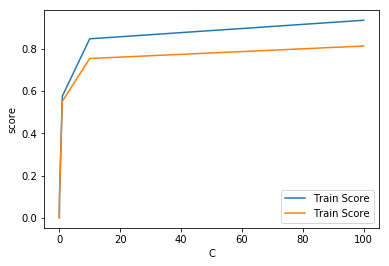

In [35]:
plt.plot(para_c, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_c, test_score, linestyle = '-', label = 'Train Score')
plt.ylabel('score'); plt.xlabel('C')
plt.legend()

> C 가 10 정도일 때 서서히 줄어들면서 이후에 일정한값을 가짐으로 `C = 10`이 적당함

In [38]:
train_score = [];test_score=[]
para_gamma = [10 ** gamma for gamma in range(-2,3)]

for v_gamma in para_gamma:
    svm = SVR(C = 10, gamma = v_gamma)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_val_x, df_validation_y))
    
df_score_gamma = pd.DataFrame()
df_score_gamma['gamma'] = para_gamma
df_score_gamma['TrainScore'] = train_score
df_score_gamma['TestScore'] = test_score
df_score_gamma['Gap'] = np.array(train_score) - np.array(test_score)
df_score_gamma.round(3)

,gamma,TrainScore,TestScore,Gap
0,0.01,0.692,0.644,0.048
1,0.10,0.839,0.757,0.082
2,1.00,0.856,0.587,0.270
3,10.00,0.740,0.282,0.458
4,100.00,0.683,0.139,0.544


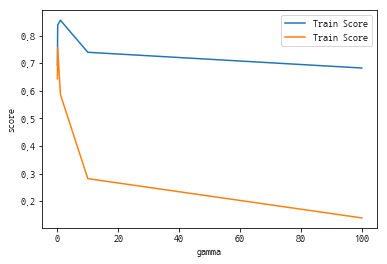

In [39]:
plt.plot(para_c, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_c, test_score, linestyle = '-', label = 'Train Score')
plt.ylabel('score'); plt.xlabel('gamma')
plt.legend()

> gamma가 증가함에 따라 train 설명력은 증가하지만 test 설명력은 오히려 감소 gamma = 0.01선택

In [42]:
train_score = [];test_score=[]
para_epsilon = [10 ** gamma for gamma in range(-2,3)]

for v_epsilon in para_epsilon:
    svm = SVR(C = 10, gamma = 0.01, epsilon = v_epsilon)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_val_x, df_validation_y))
    
df_score_epsilon = pd.DataFrame()
df_score_epsilon['epsilon'] = para_epsilon
df_score_epsilon['TrainScore'] = train_score
df_score_epsilon['TestScore'] = test_score
df_score_epsilon['Gap'] = np.array(train_score) - np.array(test_score)
df_score_epsilon.round(3)

,epsilon,TrainScore,TestScore,Gap
0,0.01,0.692,0.643,0.049
1,0.10,0.692,0.644,0.048
2,1.00,0.692,0.644,0.047
3,10.00,0.641,0.611,0.029
4,100.00,-0.153,-0.177,0.024


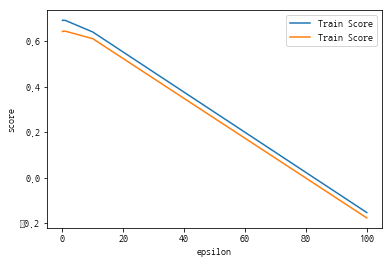

In [43]:
plt.plot(para_c, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_c, test_score, linestyle = '-', label = 'Train Score')
plt.ylabel('score'); plt.xlabel('epsilon')
plt.legend()

> epsilon = 10 서로 점차 감소하는 모양에서 테스트와 트레인 데이터의 간격이 제일 작기 때문에 선택

In [57]:
svr_final = SVR(C=10, gamma=0.01, epsilon = 10)
svr_final.fit(df_scaled_train_x, df_train_y)

print('Score on training set : {:.3f}'.format(svr_final.score(df_scaled_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(svr_final.score(df_sca, df_scaled_test_yled_train_x, df_scaled_test_y)))

ValueError: Found input variables with inconsistent numbers of samples: [259, 432]